In [26]:
import os
import sys

# Set FreeSurfer environment variables
os.environ["FREESURFER_HOME"] = "/Applications/freesurfer/7.4.1"
os.environ["SUBJECTS_DIR"] = os.environ["FREESURFER_HOME"] + "/subjects"
os.environ["FUNCTIONALS_DIR"] = os.environ["FREESURFER_HOME"] + "/sessions"
os.environ["FSFAST_HOME"] = os.environ["FREESURFER_HOME"] + "/fsfast"
os.environ["FSF_OUTPUT_FORMAT"] = "nii.gz"
os.environ["LOCAL_DIR"] = os.environ["FREESURFER_HOME"] + "/local"
os.environ["FSL_DIR"] = "/usr/local/fsl"
os.environ["FSL_BIN"] = os.environ["FSL_DIR"] + "/bin"
os.environ["PATH"] = f"{os.environ['FREESURFER_HOME']}/bin:{os.environ['FSFAST_HOME']}/bin:{os.environ['FSL_BIN']}:{os.environ['PATH']}"

# Optional MINC toolkit setup
if "NO_MINC" not in os.environ:
    os.environ["MINC_BIN_DIR"] = os.path.join(os.environ["FREESURFER_HOME"], "mni", "bin")
    os.environ["MINC_LIB_DIR"] = os.path.join(os.environ["FREESURFER_HOME"], "mni", "lib")
    os.environ["MNI_DIR"] = os.path.join(os.environ["FREESURFER_HOME"], "mni")
    os.environ["PATH"] = f"{os.environ['MINC_BIN_DIR']}:{os.environ['PATH']}"

# Optional: Set Perl library path for MINC toolkit
if "MNI_PERL5LIB" not in os.environ:
    mni_perl5lib = os.path.join(os.environ["FREESURFER_HOME"], "mni", "share", "perl5")
    os.environ["MNI_PERL5LIB"] = mni_perl5lib
    os.environ["PERL5LIB"] = mni_perl5lib

# Library paths for MacOS
if sys.platform == "darwin":
    misc_lib = os.path.join(os.environ["FREESURFER_HOME"], "lib", "misc", "lib")
    os.environ["DYLD_LIBRARY_PATH"] = f"{misc_lib}:{os.environ.get('DYLD_LIBRARY_PATH', '')}"

# Set up FSL environment
if "FSL_DIR" in os.environ:
    os.environ["FSLDIR"] = os.environ["FSL_DIR"]
    os.environ["FSLOUTPUTTYPE"] = "NIFTI_GZ"
    if "FSL_BIN" in os.environ:
        os.environ["PATH"] = f"{os.environ['FSL_BIN']}:{os.environ['PATH']}"

# Add FastSurferCNN directory to PYTHONPATH
fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer"
os.environ["PYTHONPATH"] = f"{fastsurferdir}:{os.environ.get('PYTHONPATH', '')}"
sys.path.append(fastsurferdir)

# Verify the environment setup
print("Environment variables set for FreeSurfer:")
print("FREESURFER_HOME:", os.environ["FREESURFER_HOME"])
print("SUBJECTS_DIR:", os.environ["SUBJECTS_DIR"])
print("FSFAST_HOME:", os.environ["FSFAST_HOME"])
print("FSF_OUTPUT_FORMAT:", os.environ["FSF_OUTPUT_FORMAT"])
print("FSL_DIR:", os.environ.get("FSL_DIR"))
print("MINC_BIN_DIR:", os.environ.get("MINC_BIN_DIR"))
print("MINC_LIB_DIR:", os.environ.get("MINC_LIB_DIR"))
print("MNI_DIR:", os.environ.get("MNI_DIR"))
print("PYTHONPATH:", os.environ["PYTHONPATH"])
print("PATH:", os.environ["PATH"])
print("DYLD_LIBRARY_PATH:", os.environ.get("DYLD_LIBRARY_PATH"))
print("PERL5LIB:", os.environ.get("PERL5LIB"))


Environment variables set for FreeSurfer:
FREESURFER_HOME: /Applications/freesurfer/7.4.1
SUBJECTS_DIR: /Applications/freesurfer/7.4.1/subjects
FSFAST_HOME: /Applications/freesurfer/7.4.1/fsfast
FSF_OUTPUT_FORMAT: nii.gz
FSL_DIR: /usr/local/fsl
MINC_BIN_DIR: /Applications/freesurfer/7.4.1/mni/bin
MINC_LIB_DIR: /Applications/freesurfer/7.4.1/mni/lib
MNI_DIR: /Applications/freesurfer/7.4.1/mni
PYTHONPATH: /Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer/FastSurferCNN:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer/FastSurferCNN:/Users/suhanasaigoli/Desktop/Proje

In [31]:
import os
import subprocess
import sys

# # Set FreeSurfer environment variables
# os.environ["FREESURFER_HOME"] = "/Applications/freesurfer/7.4.1"
# freesurfer_setup_script = os.path.join(os.environ["FREESURFER_HOME"], "SetUpFreeSurfer.sh")

# # Source the FreeSurfer setup script
# subprocess.run(f"source {freesurfer_setup_script}", shell=True, executable='/usr/local/bin/bash')

# Data directories
datadir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer/OAS1_0001/mri"
fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer"

# Dynamic FastSurfer directories 
fastsurfercnndir = os.path.join(fastsurferdir, "FastSurferCNN")
reconsurfdir = os.path.join(fastsurferdir, "recon_surf")

# Add FastSurferCNN directory to PYTHONPATH
os.environ["PYTHONPATH"] = f"{fastsurferdir}:{os.environ.get('PYTHONPATH', '')}"
sys.path.append(fastsurferdir)

# # Verify if FastSurferCNN module can be imported
# try:
#     import FastSurferCNN.reduce_to_aseg as rta
#     print("FastSurferCNN module imported successfully")
# except ImportError as e:
#     print("Failed to import FastSurferCNN module:", e)

# Subject-specific variables
subject = "OAS_0001-2"
t1 = os.path.join(datadir, "t1.mgz")
sd = os.path.join(fastsurferdir, subject)

merged_segfile = os.path.join(sd, "mri", "fastsurfer.merged.mgz")
asegdkt_segfile = os.path.join(sd, "mri", "aparc.DKTatlas+aseg.deep.mgz")
asegdkt_statsfile = os.path.join(sd, "stats", "aseg+DKT.stats")
cereb_segfile = os.path.join(sd, "mri", "cerebellum.CerebNet.nii.gz")
cereb_statsfile = os.path.join(sd, "stats", "cerebellum.CerebNet.stats")
mask_name = os.path.join(sd, "mri", "mask.mgz")
conformed_name = os.path.join(sd, "mri", "orig.mgz")
norm_name = os.path.join(sd, "mri", "orig_nu.mgz")
seg_log = os.path.join(sd, "scripts", "deep-seg.log")
build_log = os.path.join(sd, "scripts", "build.log")
aseg_segfile = os.path.join(sd, "mri", "aseg.auto_noCCseg.mgz")

device = "auto"
viewagg = "auto"
batch_size = 1
threads = 4
python = "python3.10"
python_args = ["-s"]
allow_root = []

# Print to verify
print("FREESURFER_HOME:", os.environ.get("FREESURFER_HOME"))
print("PYTHONPATH:", os.environ.get("PYTHONPATH"))
print("sys.path:", sys.path)
print("Data Directory:", datadir)
print("FastSurfer Directory:", fastsurferdir)
print("FastSurferCNN Directory:", fastsurfercnndir)
print("ReconSurf Directory:", reconsurfdir)

def run_segmentation(t1, subject, threads, sd, allow_root=False):
    """
    Run the FastSurfer segmentation process.

    Args:
        t1 (str): Path to the T1-weighted MRI image file.
        subject (str): Subject ID.
        threads (int): Number of threads to use for parallel processing.
        sd (str): Output subject directory.
        allow_root (bool, optional): Allow running the script as root. Defaults to False.

    Raises:
        subprocess.CalledProcessError: If the segmentation process fails.
    """
    cmd = [
        python, *python_args,
        os.path.join(fastsurfercnndir, "run_prediction.py"),
        "--t1", t1,
        "--sid", subject,
        "--threads", str(threads),
        "--sd", fastsurferdir
    ]

    if allow_root:
        cmd.append("--allow_root")

    try:
        result = subprocess.run(cmd, check=True, capture_output=True, text=True)
        print("Segmentation completed successfully.")
        print("stdout:", result.stdout)
        print("stderr:", result.stderr)
    except subprocess.CalledProcessError as e:
        print("Segmentation failed:")
        print(f"Command: {e.cmd}")
        print(f"Return code: {e.returncode}")
        print(f"Output: {e.stdout}")
        print(f"Error: {e.stderr}")
        raise

def run_biasfield_correction(conformed_name, norm_name, asegdkt_segfile, threads):
    """
    Run the N4 bias field correction on the input MRI image.

    Args:
        conformed_name (str): Path to the conformed MRI image.
        norm_name (str): Path to the normalized MRI image.
        asegdkt_segfile (str): Path to the DKT atlas segmentation file.
        threads (int): Number of threads to use for parallel processing.

    Raises:
        subprocess.CalledProcessError: If the bias field correction fails.
    """
    cmd = [
        python,
        os.path.join(reconsurfdir, "N4_bias_correct.py"),
        "--in", conformed_name,
        "--rescale", norm_name,
        "--aseg", asegdkt_segfile,
        "--threads", str(threads)
    ]

    try:
        result = subprocess.run(cmd, check=True, capture_output=True, text=True)
        print("Bias-field correction completed successfully.")
        print("stdout:", result.stdout)
        print("stderr:", result.stderr)
    except subprocess.CalledProcessError as e:
        print("Bias-field correction failed:")
        print(f"Command: {e.cmd}")
        print(f"Return code: {e.returncode}")
        print(f"Output: {e.stdout}")
        print(f"Error: {e.stderr}")
        raise

def run_recon_surf(subject, sd, threads):
    """
    Run the recon-surf process.

    Args:
        subject (str): Subject ID.
        sd (str): Output subject directory.
        threads (int): Number of threads to use for parallel processing.

    Raises:
        subprocess.CalledProcessError: If the recon-surf process fails.
    """
    cmd = [
        python,
        os.path.join(reconsurfdir, "recon_surf.py"),
        "--sid", subject,
        "--sd", sd,
        "--threads", str(threads)
    ]

    try:
        result = subprocess.run(cmd, check=True, capture_output=True, text=True)
        print("Recon-surf process completed successfully.")
        print("stdout:", result.stdout)
        print("stderr:", result.stderr)
    except subprocess.CalledProcessError as e:
        print("Recon-surf process failed:")
        print(f"Command: {e.cmd}")
        print(f"Return code: {e.returncode}")
        print(f"Output: {e.stdout}")
        print(f"Error: {e.stderr}")
        raise
    
# Run the entire pipeline
try:
    run_segmentation(t1, subject, threads, sd, allow_root)
    run_biasfield_correction(conformed_name, norm_name, asegdkt_segfile, threads)
    print("FastSurfer pipeline completed successfully.")
    
    # Check if the necessary output files are generated
    output_files = [
        asegdkt_segfile,
        aseg_segfile,
        conformed_name,
        norm_name,
        seg_log,
        build_log,
        asegdkt_statsfile,
        cereb_segfile,
        cereb_statsfile,
        merged_segfile
    ]
    
    missing_files = [f for f in output_files if not os.path.exists(f)]
    if missing_files:
        print("The following expected output files are missing:")
        for f in missing_files:
            print(f)
    else:
        print("Output files generated successfully.")
        
     
        
except Exception as e:
    print("Pipeline failed:", e)


FREESURFER_HOME: /Applications/freesurfer/7.4.1
PYTHONPATH: /Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer/FastSurferCNN:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer/FastSurferCNN:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer/FastSurferCNN:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer/FastSurferCNN:/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer/FastSurferCNN:/Users/suhanasaigoli/Desktop/Projects/SURF/i

Total number of slices along axis 1: 256
Selected slice indices: [  0  28  56  85 113 141 170 198 226 255]


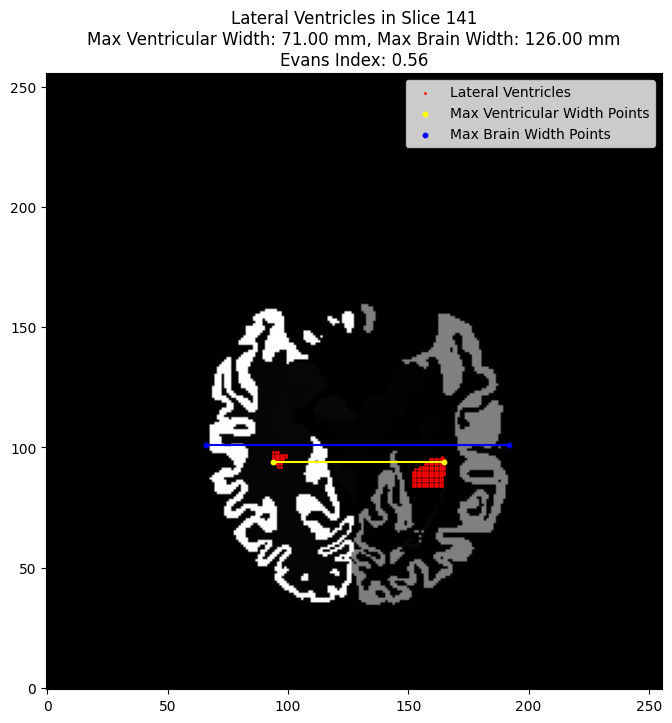

Maximum width of frontal horns in slice 141: 71.00 mm
Maximum left-to-right distance of the brain in slice 141: 126.00 mm
Evans Index: 0.56


In [30]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import find_contours

def visualize_and_measure_frontal_horns_and_brain_contours(segmentation_path, lv_labels=[4, 43], brain_labels=[2, 41], slice_axis=1, num_intervals=10):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Find the coordinates of the lateral ventricles
    lv_coords = np.argwhere(np.isin(seg_data, lv_labels))
    
    if lv_coords.size == 0:
        print("No lateral ventricles found.")
        return
    
    # Find the coordinates of the brain regions
    brain_coords = np.argwhere(np.isin(seg_data, brain_labels))
    
    if brain_coords.size == 0:
        print("No brain regions found.")
        return
    
    # Determine the total number of slices along the specified axis
    num_slices = seg_data.shape[slice_axis]
    print(f"Total number of slices along axis {slice_axis}: {num_slices}")

    # Generate a list of slices at equal intervals
    slice_range = np.linspace(0, num_slices - 1, num_intervals, dtype=int)
    print(f"Selected slice indices: {slice_range}")

    max_lv_distance = 0
    max_brain_distance = 0
    best_slice_idx = None
    best_lv_coords = None
    best_brain_coords = None

    for slice_idx in slice_range:
        # Extract the slice
        if slice_axis == 0:
            slice_data = seg_data[slice_idx, :, :]
        elif slice_axis == 1:
            slice_data = seg_data[:, slice_idx, :]
        else:
            slice_data = seg_data[:, :, slice_idx]

        # Find the coordinates of the lateral ventricles and brain regions in this slice
        if slice_axis == 0:
            slice_lv_coords = lv_coords[lv_coords[:, 0] == slice_idx][:, 1:]
            slice_brain_coords = brain_coords[brain_coords[:, 0] == slice_idx][:, 1:]
        elif slice_axis == 1:
            slice_lv_coords = lv_coords[lv_coords[:, 1] == slice_idx][:, [0, 2]]
            slice_brain_coords = brain_coords[brain_coords[:, 1] == slice_idx][:, [0, 2]]
        else:
            slice_lv_coords = lv_coords[lv_coords[:, 2] == slice_idx][:, :2]
            slice_brain_coords = brain_coords[brain_coords[:, 2] == slice_idx][:, :2]

        # Check if there are enough points to consider this slice
        if slice_lv_coords.shape[0] < 2 or slice_brain_coords.shape[0] < 2:
            continue

        # Find upper and lower extremities to determine the midpoint
        max_y = slice_lv_coords[:, 1].max()
        min_y = slice_lv_coords[:, 1].min()
        midpoint_y = (max_y + min_y) / 2

        # Filter points above the midpoint
        upper_lv_coords = slice_lv_coords[slice_lv_coords[:, 1] > midpoint_y]

        # Check if there are enough points above the midpoint
        if upper_lv_coords.shape[0] < 2:
            continue

        # Group points by their y-coordinate to ensure horizontal distance measurement
        y_unique = np.unique(upper_lv_coords[:, 1])
        for y in y_unique:
            y_points = upper_lv_coords[upper_lv_coords[:, 1] == y]
            if y_points.shape[0] < 2:
                continue

            # Calculate the horizontal distance between points in this row
            x_coords = y_points[:, 0]
            dist = np.max(x_coords) - np.min(x_coords)
            
            if dist > max_lv_distance:
                max_lv_distance = dist
                y_value = y  # Y-value for horizontal measurement
                best_lv_coords = np.array([[np.min(x_coords), y_value], [np.max(x_coords), y_value]])
                best_slice_idx = slice_idx

        # Find the maximum left-right distance of the brain contours
        contours = find_contours(slice_data.T, level=0.5)
        for contour in contours:
            max_x = contour[:, 1].max()
            min_x = contour[:, 1].min()
            brain_dist = max_x - min_x
            if brain_dist > max_brain_distance:
                max_brain_distance = brain_dist
                y_value = contour[contour[:, 1] == min_x, 0][0]  # Y-value for horizontal measurement
                best_brain_coords = np.array([[min_x, y_value], [max_x, y_value]])

    # Calculate the Evans Index
    if max_brain_distance > 0:
        evans_index = max_lv_distance / max_brain_distance
    else:
        evans_index = None

    # Plot the best slice with both measurements
    if best_slice_idx is not None:
        if slice_axis == 0:
            slice_data = seg_data[best_slice_idx, :, :]
        elif slice_axis == 1:
            slice_data = seg_data[:, best_slice_idx, :]
        else:
            slice_data = seg_data[:, :, best_slice_idx]

        plt.figure(figsize=(8, 8))
        plt.imshow(slice_data.T, cmap='gray', origin='lower')

        # Highlight the lateral ventricles
        plt.scatter(upper_lv_coords[:, 0], upper_lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')

        # Highlight the maximum width points for the ventricles
        if best_lv_coords is not None:
            plt.scatter(best_lv_coords[:, 0], best_lv_coords[:, 1], c='yellow', s=10, label='Max Ventricular Width Points')
            plt.plot(best_lv_coords[:, 0], best_lv_coords[:, 1], c='yellow')

        # Highlight the maximum width points for the brain
        if best_brain_coords is not None:
            plt.scatter(best_brain_coords[:, 0], best_brain_coords[:, 1], c='blue', s=10, label='Max Brain Width Points')
            plt.plot(best_brain_coords[:, 0], best_brain_coords[:, 1], c='blue')

        title = f'Lateral Ventricles in Slice {best_slice_idx}\nMax Ventricular Width: {max_lv_distance:.2f} mm, Max Brain Width: {max_brain_distance:.2f} mm'
        if evans_index is not None:
            title += f'\nEvans Index: {evans_index:.2f}'

        plt.title(title)
        plt.legend()
        plt.show()

        print(f'Maximum width of frontal horns in slice {best_slice_idx}: {max_lv_distance:.2f} mm')
        print(f'Maximum left-to-right distance of the brain in slice {best_slice_idx}: {max_brain_distance:.2f} mm')
        if evans_index is not None:
            print(f'Evans Index: {evans_index:.2f}')
    else:
        print("No suitable slice found with both lateral ventricles and brain regions.")

# Example usage
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")
visualize_and_measure_frontal_horns_and_brain_contours(segmentation_path, num_intervals=10)


In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import find_contours

def visualize_ventricles_in_all_axes(segmentation_path, lv_labels=[4, 43]):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Find the coordinates of the lateral ventricles
    lv_coords = np.argwhere(np.isin(seg_data, lv_labels))
    
    if lv_coords.size == 0:
        print("No lateral ventricles found.")
        return
    
    axes = [0, 1, 2]
    axis_names = ['Sagittal', 'Coronal', 'Axial']

    for axis, axis_name in zip(axes, axis_names):
        num_slices = seg_data.shape[axis]
        print(f"Visualizing {axis_name} slices: total {num_slices} slices")

        for slice_idx in range(num_slices):
            # Extract the slice
            if axis == 0:
                slice_data = seg_data[slice_idx, :, :]
            elif axis == 1:
                slice_data = seg_data[:, slice_idx, :]
            else:
                slice_data = seg_data[:, :, slice_idx]

            # Find the coordinates of the lateral ventricles in this slice
            if axis == 0:
                slice_lv_coords = lv_coords[lv_coords[:, 0] == slice_idx][:, 1:]
            elif axis == 1:
                slice_lv_coords = lv_coords[lv_coords[:, 1] == slice_idx][:, [0, 2]]
            else:
                slice_lv_coords = lv_coords[lv_coords[:, 2] == slice_idx][:, :2]

            # Check if there are enough points to consider this slice
            if slice_lv_coords.shape[0] < 2:
                continue

            # Plot the slice
            plt.figure(figsize=(8, 8))
            plt.imshow(slice_data.T, cmap='gray', origin='lower')

            # Highlight the lateral ventricles
            plt.scatter(slice_lv_coords[:, 0], slice_lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')

            plt.title(f'{axis_name} Slice {slice_idx}')
            plt.legend()
            plt.show()

# Example usage
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")
visualize_ventricles_in_all_axes(segmentation_path)


Slices with connection between lateral ventricles and third ventricle: [124, 125, 126, 132, 133, 134, 135]
Range of y-coordinates (slices) containing the Foramen of Monro: 124 to 129


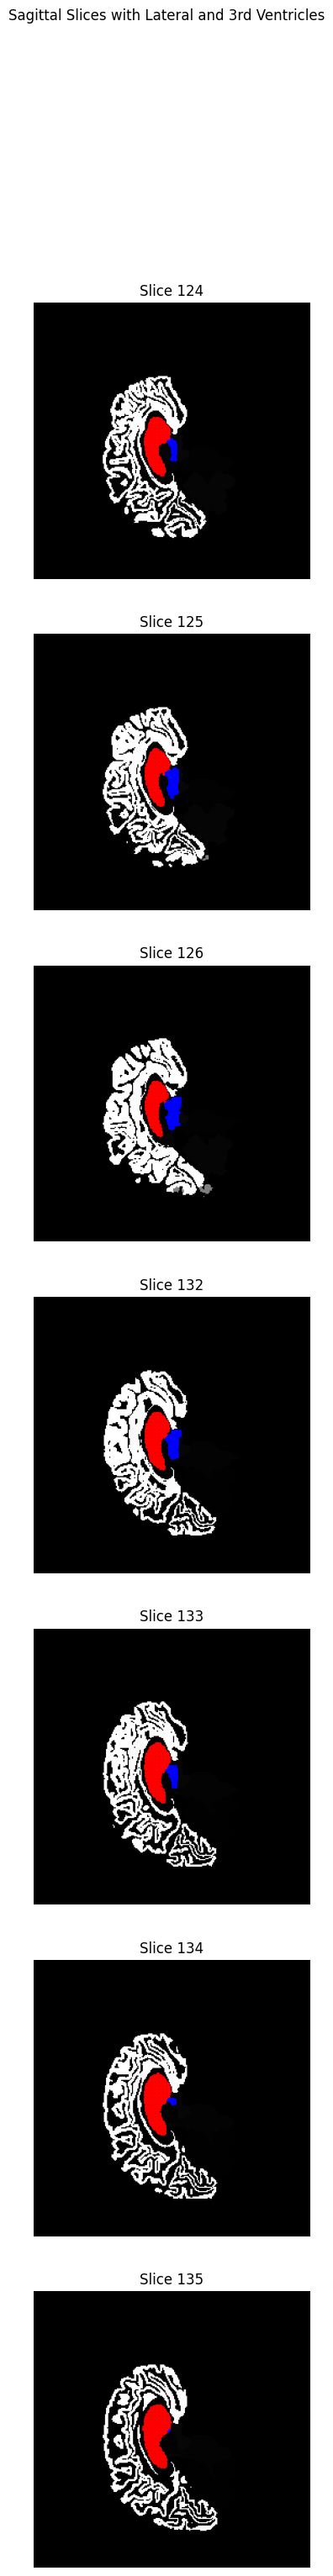

In [13]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import binary_dilation

def find_foramen_of_monro_slices(segmentation_path, lv_labels=[4, 43], third_ventricle_label=14, dilation_iterations=1):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Get the shape of the segmentation data
    shape = seg_data.shape

    # List to store the slices where the connection is found
    connecting_slices = []

    # To store the range of y-coordinates
    y_min = float('inf')
    y_max = -float('inf')

    for i in range(shape[0]):
        sagittal_slice = seg_data[i, :, :]

        # Create binary masks for the lateral ventricles and the third ventricle
        lv_mask = np.isin(sagittal_slice, lv_labels)
        third_ventricle_mask = sagittal_slice == third_ventricle_label

        # Dilate the lateral ventricles mask to check for adjacency
        dilated_lv_mask = binary_dilation(lv_mask, iterations=dilation_iterations)

        # Check for intersection
        intersection = np.logical_and(dilated_lv_mask, third_ventricle_mask)

        if np.any(intersection):
            connecting_slices.append(i)
            y_coords = np.argwhere(intersection)[:, 1]  # y-coordinates of the intersection
            y_min = min(y_min, y_coords.min())
            y_max = max(y_max, y_coords.max())

    return connecting_slices, y_min, y_max

def visualize_slices(segmentation_path, slices, lv_labels=[4, 43], third_ventricle_label=14):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    num_slices = len(slices)
    fig, axes = plt.subplots(num_slices, 1, figsize=(5, num_slices * 5))

    if num_slices == 1:
        axes = [axes]

    for idx, slice_idx in enumerate(slices):
        sagittal_slice = seg_data[slice_idx, :, :]

        # Find coordinates of lateral ventricles and third ventricle in this slice
        lv_coords = np.argwhere(np.isin(sagittal_slice, lv_labels))
        third_ventricle_coords = np.argwhere(sagittal_slice == third_ventricle_label)

        ax = axes[idx]
        ax.imshow(sagittal_slice.T, cmap='gray', origin='lower')
        ax.set_title(f'Slice {slice_idx}')
        ax.axis('off')

        if lv_coords.size > 0:
            ax.scatter(lv_coords[:, 0], lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')

        if third_ventricle_coords.size > 0:
            ax.scatter(third_ventricle_coords[:, 0], third_ventricle_coords[:, 1], c='blue', s=1, label='Third Ventricle')

    plt.suptitle('Sagittal Slices with Lateral and 3rd Ventricles')
    plt.show()

fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer"

# Construct the path dynamically
segmentation_path = os.path.join(fastsurferdir, "OAS_0001-2", "mri", "aparc.DKTatlas+aseg.deep.mgz")

# Find the slices where the Foramen of Monro is located
connecting_slices, y_min, y_max = find_foramen_of_monro_slices(segmentation_path)

print(f"Slices with connection between lateral ventricles and third ventricle: {connecting_slices}")
print(f"Range of y-coordinates (slices) containing the Foramen of Monro: {y_min} to {y_max}")

# Visualize the detected slices
visualize_slices(segmentation_path, connecting_slices)


Slices containing the foramen of Monro: [124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]


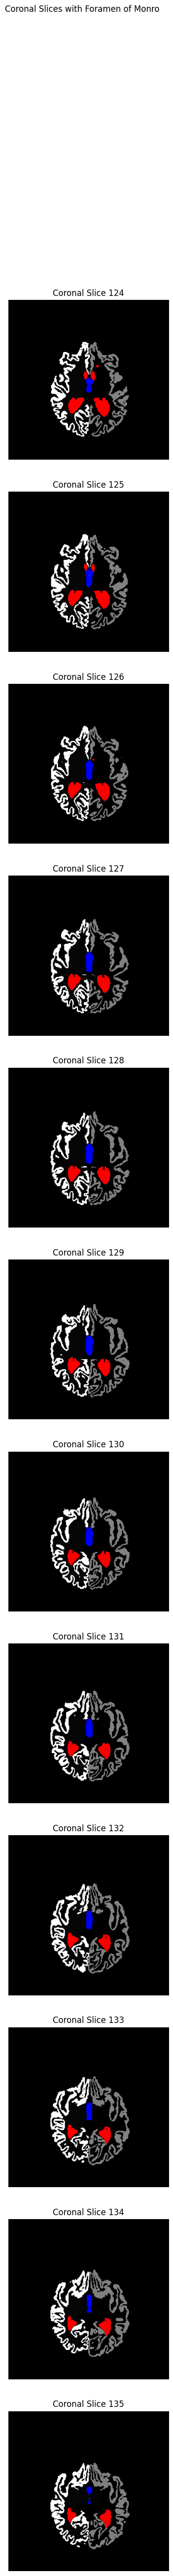

In [15]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

def find_foramen_of_monro_slices(segmentation_path, lv_labels=[4, 43], third_ventricle_label=14):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Get the shape of the segmentation data
    shape = seg_data.shape

    # List to store the slices where the connection is found
    connecting_slices = []

    # Iterate through each sagittal slice
    for i in range(shape[0]):
        sagittal_slice = seg_data[i, :, :]

        # Find coordinates of lateral ventricles and third ventricle in this slice
        lv_coords = np.argwhere(np.isin(sagittal_slice, lv_labels))
        third_ventricle_coords = np.argwhere(sagittal_slice == third_ventricle_label)

        if lv_coords.size > 0 and third_ventricle_coords.size > 0:
            # Check for intersection of voxels between lateral ventricles and third ventricle
            if np.any(np.isin(lv_coords[:, 1], third_ventricle_coords[:, 1])):
                connecting_slices.append(i)

    return connecting_slices

def visualize_coronal_slices(segmentation_path, slices, lv_labels=[4, 43], third_ventricle_label=14):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Visualize each slice
    fig, axes = plt.subplots(len(slices), 1, figsize=(10, len(slices) * 5))

    for idx, slice_idx in enumerate(slices):
        coronal_slice = seg_data[:, slice_idx, :]

        # Find coordinates of lateral ventricles and third ventricle in this slice
        lv_coords = np.argwhere(np.isin(coronal_slice, lv_labels))
        third_ventricle_coords = np.argwhere(coronal_slice == third_ventricle_label)

        ax = axes[idx]
        ax.imshow(coronal_slice.T, cmap='gray', origin='lower')
        ax.set_title(f'Coronal Slice {slice_idx}')
        ax.axis('off')

        if lv_coords.size > 0:
            ax.scatter(lv_coords[:, 0], lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')

        if third_ventricle_coords.size > 0:
            ax.scatter(third_ventricle_coords[:, 0], third_ventricle_coords[:, 1], c='blue', s=1, label='Third Ventricle')

    plt.suptitle('Coronal Slices with Foramen of Monro')
    plt.show()

fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer"
subject = "OAS_0001-2"

# Construct the path dynamically
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")

# Find the coronal slices containing the foramen of Monro
connecting_slices = find_foramen_of_monro_slices(segmentation_path)

if connecting_slices:
    print(f"Slices containing the foramen of Monro: {connecting_slices}")
    # Visualize the slices
    visualize_coronal_slices(segmentation_path, connecting_slices)
else:
    print("No slices found containing the foramen of Monro.")


Slices containing the foramen of Monro: [124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]
All slices to visualize: [119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]


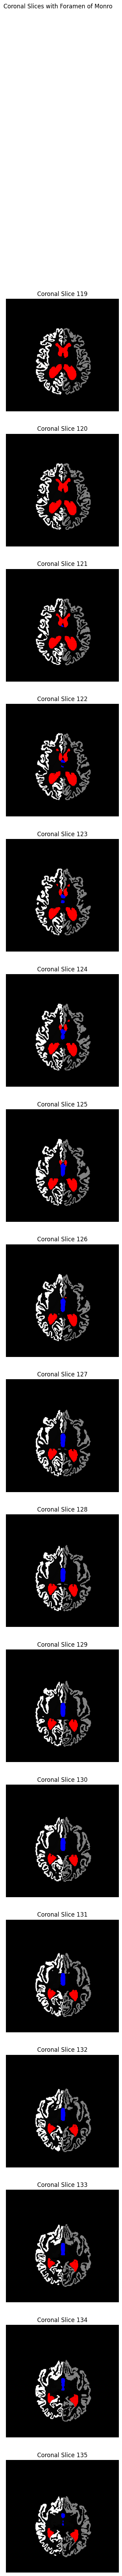

In [16]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

def find_foramen_of_monro_slices(segmentation_path, lv_labels=[4, 43], third_ventricle_label=14):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Get the shape of the segmentation data
    shape = seg_data.shape

    # List to store the slices where the connection is found
    connecting_slices = []

    # Iterate through each sagittal slice
    for i in range(shape[0]):
        sagittal_slice = seg_data[i, :, :]

        # Find coordinates of lateral ventricles and third ventricle in this slice
        lv_coords = np.argwhere(np.isin(sagittal_slice, lv_labels))
        third_ventricle_coords = np.argwhere(sagittal_slice == third_ventricle_label)

        if lv_coords.size > 0 and third_ventricle_coords.size > 0:
            # Check for intersection of voxels between lateral ventricles and third ventricle
            if np.any(np.isin(lv_coords[:, 1], third_ventricle_coords[:, 1])):
                connecting_slices.append(i)

    return connecting_slices

def visualize_coronal_slices(segmentation_path, slices, lv_labels=[4, 43], third_ventricle_label=14):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Visualize each slice
    fig, axes = plt.subplots(len(slices), 1, figsize=(10, len(slices) * 5))

    for idx, slice_idx in enumerate(slices):
        coronal_slice = seg_data[:, slice_idx, :]

        # Find coordinates of lateral ventricles and third ventricle in this slice
        lv_coords = np.argwhere(np.isin(coronal_slice, lv_labels))
        third_ventricle_coords = np.argwhere(coronal_slice == third_ventricle_label)

        ax = axes[idx]
        ax.imshow(coronal_slice.T, cmap='gray', origin='lower')
        ax.set_title(f'Coronal Slice {slice_idx}')
        ax.axis('off')

        if lv_coords.size > 0:
            ax.scatter(lv_coords[:, 0], lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')

        if third_ventricle_coords.size > 0:
            ax.scatter(third_ventricle_coords[:, 0], third_ventricle_coords[:, 1], c='blue', s=1, label='Third Ventricle')

    plt.suptitle('Coronal Slices with Foramen of Monro')
    plt.show()

fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer"
subject = "OAS_0001-2"

# Construct the path dynamically
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")

# Find the coronal slices containing the foramen of Monro
connecting_slices = find_foramen_of_monro_slices(segmentation_path)

if connecting_slices:
    print(f"Slices containing the foramen of Monro: {connecting_slices}")
    # Add the 5 slices prior to the first identified slice
    start_slice = max(connecting_slices[0] - 5, 0)
    additional_slices = list(range(start_slice, connecting_slices[0]))
    all_slices = additional_slices + connecting_slices
    print(f"All slices to visualize: {all_slices}")
    # Visualize the slices
    visualize_coronal_slices(segmentation_path, all_slices)
else:
    print("No slices found containing the foramen of Monro.")


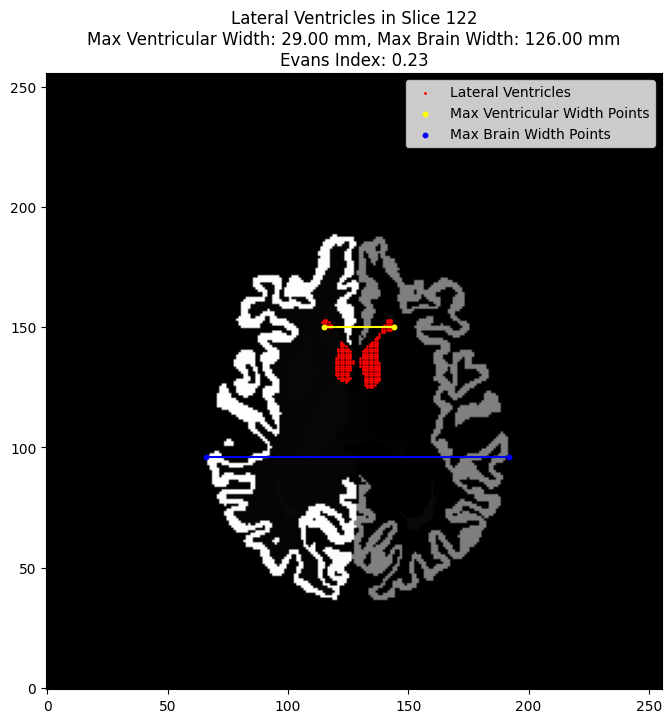

Maximum width of frontal horns in slice 122: 29.00 mm
Maximum left-to-right distance of the brain in slice 122: 126.00 mm
Evans Index: 0.23


In [25]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import find_contours
import os

def visualize_and_measure_frontal_horns_and_brain_contours(segmentation_path, lv_labels=[4, 43], brain_labels=[2, 41], slice_idx=122):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Find the coordinates of the lateral ventricles
    lv_coords = np.argwhere(np.isin(seg_data, lv_labels))
    
    if lv_coords.size == 0:
        print("No lateral ventricles found.")
        return
    
    # Find the coordinates of the brain regions
    brain_coords = np.argwhere(np.isin(seg_data, brain_labels))
    
    if brain_coords.size == 0:
        print("No brain regions found.")
        return

    # Extract the specified slice
    slice_data = seg_data[:, slice_idx, :]

    # Find the coordinates of the lateral ventricles and brain regions in this slice
    slice_lv_coords = lv_coords[lv_coords[:, 1] == slice_idx][:, [0, 2]]
    slice_brain_coords = brain_coords[brain_coords[:, 1] == slice_idx][:, [0, 2]]

    if slice_lv_coords.shape[0] < 2 or slice_brain_coords.shape[0] < 2:
        print("Not enough points found in the slice for analysis.")
        return

    # Find upper and lower extremities to determine the midpoint
    max_y = slice_lv_coords[:, 1].max()
    min_y = slice_lv_coords[:, 1].min()
    midpoint_y = (max_y + min_y) / 2

    # Filter points above the midpoint
    upper_lv_coords = slice_lv_coords[slice_lv_coords[:, 1] > midpoint_y]

    if upper_lv_coords.shape[0] < 2:
        print("Not enough points found above the midpoint for analysis.")
        return

    # Group points by their y-coordinate to ensure horizontal distance measurement
    y_unique = np.unique(upper_lv_coords[:, 1])
    max_lv_distance = 0
    best_lv_coords = None

    for y in y_unique:
        y_points = upper_lv_coords[upper_lv_coords[:, 1] == y]
        if y_points.shape[0] < 2:
            continue

        x_coords = y_points[:, 0]
        dist = np.max(x_coords) - np.min(x_coords)

        if dist > max_lv_distance:
            max_lv_distance = dist
            y_value = y
            best_lv_coords = np.array([[np.min(x_coords), y_value], [np.max(x_coords), y_value]])

    # Find the maximum left-right distance of the brain contours
    contours = find_contours(slice_data.T, level=0.5)
    max_brain_distance = 0
    best_brain_coords = None

    for contour in contours:
        max_x = contour[:, 1].max()
        min_x = contour[:, 1].min()
        brain_dist = max_x - min_x
        if brain_dist > max_brain_distance:
            max_brain_distance = brain_dist
            y_value = contour[contour[:, 1] == min_x, 0][0]
            best_brain_coords = np.array([[min_x, y_value], [max_x, y_value]])

    # Calculate the Evans Index
    if max_brain_distance > 0:
        evans_index = max_lv_distance / max_brain_distance
    else:
        evans_index = None

    # Plot the slice with both measurements
    plt.figure(figsize=(8, 8))
    plt.imshow(slice_data.T, cmap='gray', origin='lower')

    # Highlight the lateral ventricles
    plt.scatter(upper_lv_coords[:, 0], upper_lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')

    # Highlight the maximum width points for the ventricles
    if best_lv_coords is not None:
        plt.scatter(best_lv_coords[:, 0], best_lv_coords[:, 1], c='yellow', s=10, label='Max Ventricular Width Points')
        plt.plot(best_lv_coords[:, 0], best_lv_coords[:, 1], c='yellow')

    # Highlight the maximum width points for the brain
    if best_brain_coords is not None:
        plt.scatter(best_brain_coords[:, 0], best_brain_coords[:, 1], c='blue', s=10, label='Max Brain Width Points')
        plt.plot(best_brain_coords[:, 0], best_brain_coords[:, 1], c='blue')

    title = f'Lateral Ventricles in Slice {slice_idx}\nMax Ventricular Width: {max_lv_distance:.2f} mm, Max Brain Width: {max_brain_distance:.2f} mm'
    if evans_index is not None:
        title += f'\nEvans Index: {evans_index:.2f}'

    plt.title(title)
    plt.legend()
    plt.show()

    print(f'Maximum width of frontal horns in slice {slice_idx}: {max_lv_distance:.2f} mm')
    print(f'Maximum left-to-right distance of the brain in slice {slice_idx}: {max_brain_distance:.2f} mm')
    if evans_index is not None:
        print(f'Evans Index: {evans_index:.2f}')

# Example usage
fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer"
subject = "OAS_0001-2"

segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")
visualize_and_measure_frontal_horns_and_brain_contours(segmentation_path, slice_idx=122
                                                       )


Coronal slices containing the foramen of Monro: [121, 122, 123, 124, 125]
Sagittal slices containing the foramen of Monro: [124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]
Matched Coronal slices: [121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121]


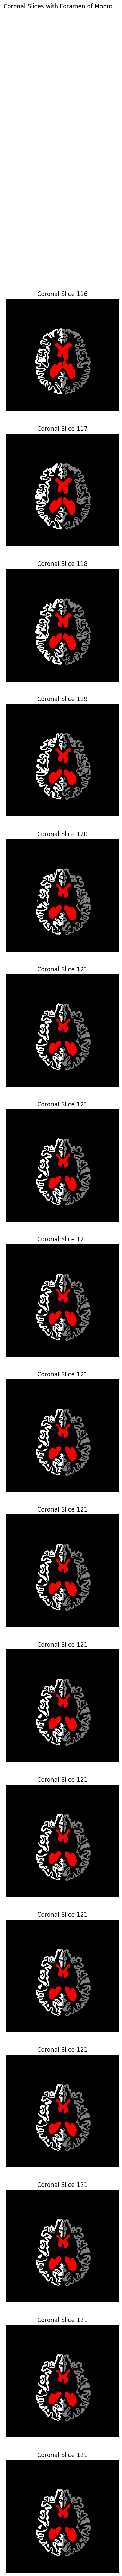

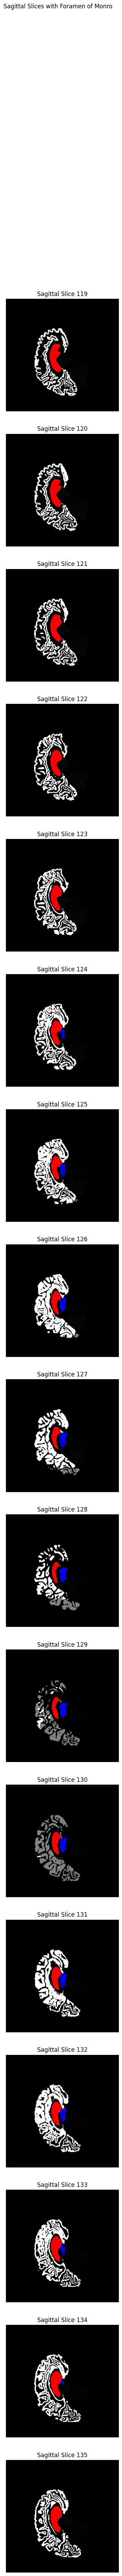

In [28]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

def find_foramen_of_monro_slices(segmentation_path, lv_labels=[4, 43], third_ventricle_label=14):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Get the shape of the segmentation data
    shape = seg_data.shape

    # List to store the slices where the connection is found
    connecting_slices = {'coronal': [], 'sagittal': []}

    # Check coronal slices
    for i in range(shape[1]):
        coronal_slice = seg_data[:, i, :]

        lv_coords = np.argwhere(np.isin(coronal_slice, lv_labels))
        third_ventricle_coords = np.argwhere(coronal_slice == third_ventricle_label)

        if lv_coords.size > 0 and third_ventricle_coords.size > 0:
            if np.any(np.isin(lv_coords[:, 1], third_ventricle_coords[:, 1])):
                connecting_slices['coronal'].append(i)

    # Check sagittal slices
    for i in range(shape[0]):
        sagittal_slice = seg_data[i, :, :]

        lv_coords = np.argwhere(np.isin(sagittal_slice, lv_labels))
        third_ventricle_coords = np.argwhere(sagittal_slice == third_ventricle_label)

        if lv_coords.size > 0 and third_ventricle_coords.size > 0:
            if np.any(np.isin(lv_coords[:, 1], third_ventricle_coords[:, 1])):
                connecting_slices['sagittal'].append(i)

    return connecting_slices

def visualize_slices(segmentation_path, slices, axis, lv_labels=[4, 43], third_ventricle_label=14):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    fig, axes = plt.subplots(len(slices), 1, figsize=(10, len(slices) * 5))

    if len(slices) == 1:
        axes = [axes]

    for idx, slice_idx in enumerate(slices):
        if axis == 'coronal':
            slice_data = seg_data[:, slice_idx, :]
        elif axis == 'sagittal':
            slice_data = seg_data[slice_idx, :, :]

        lv_coords = np.argwhere(np.isin(slice_data, lv_labels))
        third_ventricle_coords = np.argwhere(slice_data == third_ventricle_label)

        ax = axes[idx]
        ax.imshow(slice_data.T, cmap='gray', origin='lower')
        ax.set_title(f'{axis.capitalize()} Slice {slice_idx}')
        ax.axis('off')

        if lv_coords.size > 0:
            ax.scatter(lv_coords[:, 0], lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')

        if third_ventricle_coords.size > 0:
            ax.scatter(third_ventricle_coords[:, 0], third_ventricle_coords[:, 1], c='blue', s=1, label='Third Ventricle')

    plt.suptitle(f'{axis.capitalize()} Slices with Foramen of Monro')
    plt.show()

def find_matching_coronal_slices(connecting_slices, lv_labels, third_ventricle_label, segmentation_path):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    coronal_slices = connecting_slices['coronal']
    sagittal_slices = connecting_slices['sagittal']

    matched_coronal_slices = []

    for sag_slice in sagittal_slices:
        sagittal_data = seg_data[sag_slice, :, :]
        lv_coords = np.argwhere(np.isin(sagittal_data, lv_labels))
        third_ventricle_coords = np.argwhere(sagittal_data == third_ventricle_label)

        if lv_coords.size > 0 and third_ventricle_coords.size > 0:
            # Find coronal slice intersection
            for cor_slice in coronal_slices:
                coronal_data = seg_data[:, cor_slice, :]
                coronal_lv_coords = np.argwhere(np.isin(coronal_data, lv_labels))
                coronal_third_ventricle_coords = np.argwhere(coronal_data == third_ventricle_label)

                if coronal_lv_coords.size > 0 and coronal_third_ventricle_coords.size > 0:
                    if np.any(np.isin(coronal_lv_coords[:, 1], third_ventricle_coords[:, 0])):
                        matched_coronal_slices.append(cor_slice)
                        break  # Stop after the first match is found

    return matched_coronal_slices

fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer"
subject = "OAS_0001-2"

segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")

connecting_slices = find_foramen_of_monro_slices(segmentation_path)

if connecting_slices['coronal'] and connecting_slices['sagittal']:
    print(f"Coronal slices containing the foramen of Monro: {connecting_slices['coronal']}")
    print(f"Sagittal slices containing the foramen of Monro: {connecting_slices['sagittal']}")

    matched_coronal_slices = find_matching_coronal_slices(connecting_slices, lv_labels=[4, 43], third_ventricle_label=14, segmentation_path=segmentation_path)
    
    if matched_coronal_slices:
        print(f"Matched Coronal slices: {matched_coronal_slices}")
        start_slice = max(matched_coronal_slices[0] - 5, 0)
        additional_slices = list(range(start_slice, matched_coronal_slices[0]))
        all_coronal_slices = additional_slices + matched_coronal_slices
        visualize_slices(segmentation_path, all_coronal_slices, 'coronal')

        start_slice = max(connecting_slices['sagittal'][0] - 5, 0)
        additional_slices = list(range(start_slice, connecting_slices['sagittal'][0]))
        all_sagittal_slices = additional_slices + connecting_slices['sagittal']
        visualize_slices(segmentation_path, all_sagittal_slices, 'sagittal')
    else:
        print("No matched coronal slices found.")
else:
    print("No slices found containing the foramen of Monro in either coronal or sagittal planes.")


Coronal slice containing the foramen of Monro: 121


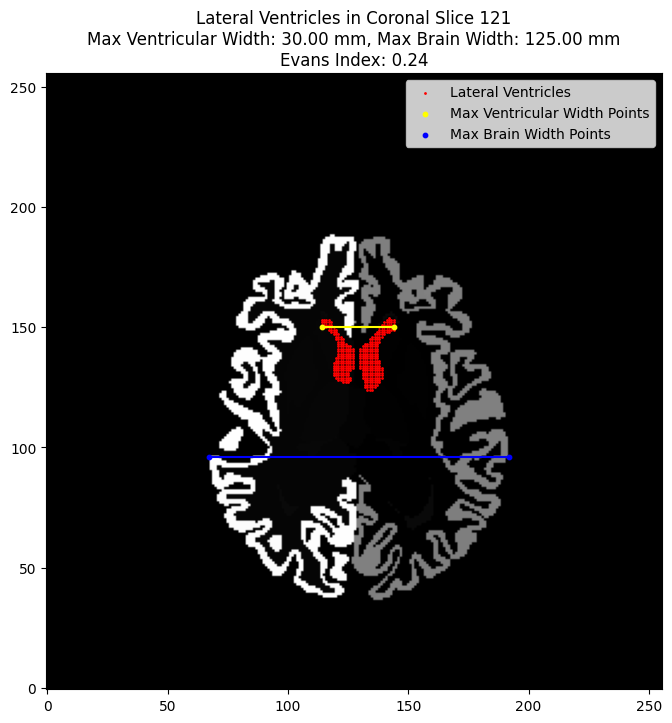

Maximum width of frontal horns in slice 121: 30.00 mm
Maximum left-to-right distance of the brain in slice 121: 125.00 mm
Evans Index: 0.24


In [29]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.measure import find_contours

def find_foramen_of_monro_coronal_slice(segmentation_path, lv_labels=[4, 43], third_ventricle_label=14):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Get the shape of the segmentation data
    shape = seg_data.shape

    # Iterate through each coronal slice
    for i in range(shape[1]):
        coronal_slice = seg_data[:, i, :]

        # Find coordinates of lateral ventricles and third ventricle in this slice
        lv_coords = np.argwhere(np.isin(coronal_slice, lv_labels))
        third_ventricle_coords = np.argwhere(coronal_slice == third_ventricle_label)

        if lv_coords.size > 0 and third_ventricle_coords.size > 0:
            # Check for intersection of voxels between lateral ventricles and third ventricle
            if np.any(np.isin(lv_coords[:, 1], third_ventricle_coords[:, 1])):
                return i

    return None

def calculate_and_visualize_evans_index(segmentation_path, coronal_slice_idx, lv_labels=[4, 43], brain_labels=[2, 41]):
    # Load the segmentation file
    seg_img = nib.load(segmentation_path)
    seg_data = seg_img.get_fdata()

    # Extract the coronal slice
    coronal_slice = seg_data[:, coronal_slice_idx, :]

    # Find coordinates of lateral ventricles and brain regions in this slice
    lv_coords = np.argwhere(np.isin(coronal_slice, lv_labels))
    brain_coords = np.argwhere(np.isin(coronal_slice, brain_labels))

    if lv_coords.size == 0 or brain_coords.size == 0:
        print("No suitable data found in the specified coronal slice.")
        return

    # Find upper and lower extremities to determine the midpoint
    max_y = lv_coords[:, 1].max()
    min_y = lv_coords[:, 1].min()
    midpoint_y = (max_y + min_y) / 2

    # Filter points above the midpoint
    upper_lv_coords = lv_coords[lv_coords[:, 1] > midpoint_y]

    # Check if there are enough points above the midpoint
    if upper_lv_coords.shape[0] < 2:
        print("Not enough points found in the upper part of the lateral ventricles.")
        return

    # Calculate the maximum horizontal distance of the lateral ventricles
    y_unique = np.unique(upper_lv_coords[:, 1])
    max_lv_distance = 0
    best_lv_coords = None

    for y in y_unique:
        y_points = upper_lv_coords[upper_lv_coords[:, 1] == y]
        if y_points.shape[0] < 2:
            continue

        # Calculate the horizontal distance between points in this row
        x_coords = y_points[:, 0]
        dist = np.max(x_coords) - np.min(x_coords)

        if dist > max_lv_distance:
            max_lv_distance = dist
            y_value = y  # Y-value for horizontal measurement
            best_lv_coords = np.array([[np.min(x_coords), y_value], [np.max(x_coords), y_value]])

    # Find the maximum left-right distance of the brain contours
    contours = find_contours(coronal_slice.T, level=0.5)
    max_brain_distance = 0
    best_brain_coords = None

    for contour in contours:
        max_x = contour[:, 1].max()
        min_x = contour[:, 1].min()
        brain_dist = max_x - min_x
        if brain_dist > max_brain_distance:
            max_brain_distance = brain_dist
            y_value = contour[contour[:, 1] == min_x, 0][0]  # Y-value for horizontal measurement
            best_brain_coords = np.array([[min_x, y_value], [max_x, y_value]])

    # Calculate the Evans Index
    if max_brain_distance > 0:
        evans_index = max_lv_distance / max_brain_distance
    else:
        evans_index = None

    # Plot the coronal slice with measurements
    plt.figure(figsize=(8, 8))
    plt.imshow(coronal_slice.T, cmap='gray', origin='lower')

    # Highlight the lateral ventricles
    plt.scatter(upper_lv_coords[:, 0], upper_lv_coords[:, 1], c='red', s=1, label='Lateral Ventricles')

    # Highlight the maximum width points for the ventricles
    if best_lv_coords is not None:
        plt.scatter(best_lv_coords[:, 0], best_lv_coords[:, 1], c='yellow', s=10, label='Max Ventricular Width Points')
        plt.plot(best_lv_coords[:, 0], best_lv_coords[:, 1], c='yellow')

    # Highlight the maximum width points for the brain
    if best_brain_coords is not None:
        plt.scatter(best_brain_coords[:, 0], best_brain_coords[:, 1], c='blue', s=10, label='Max Brain Width Points')
        plt.plot(best_brain_coords[:, 0], best_brain_coords[:, 1], c='blue')

    title = f'Lateral Ventricles in Coronal Slice {coronal_slice_idx}\nMax Ventricular Width: {max_lv_distance:.2f} mm, Max Brain Width: {max_brain_distance:.2f} mm'
    if evans_index is not None:
        title += f'\nEvans Index: {evans_index:.2f}'

    plt.title(title)
    plt.legend()
    plt.show()

    print(f'Maximum width of frontal horns in slice {coronal_slice_idx}: {max_lv_distance:.2f} mm')
    print(f'Maximum left-to-right distance of the brain in slice {coronal_slice_idx}: {max_brain_distance:.2f} mm')
    if evans_index is not None:
        print(f'Evans Index: {evans_index:.2f}')

# Example usage
fastsurferdir = "/Users/suhanasaigoli/Desktop/Projects/SURF/iNPH/FastSurfer"
subject = "OAS_0001-2"

# Construct the path dynamically
segmentation_path = os.path.join(fastsurferdir, subject, "mri", "aparc.DKTatlas+aseg.deep.mgz")

# Find the coronal slice containing the foramen of Monro
coronal_slice_idx = find_foramen_of_monro_coronal_slice(segmentation_path)

if coronal_slice_idx is not None:
    print(f"Coronal slice containing the foramen of Monro: {coronal_slice_idx}")
    # Calculate and visualize Evans Index for the identified coronal slice
    calculate_and_visualize_evans_index(segmentation_path, coronal_slice_idx)
else:
    print("No coronal slice found containing the foramen of Monro.")
